# DATA 11800 (Section 1), Autumn 2023

# Homework 5: Probability, Sampling and Joins (50 points)


Please complete this notebook by filling in the cells provided.

The solved homework should be uploaded to Canvas as an .ipynb file. DO NOT put your answers in more than one file or use a different file extension.

Make sure to RUN ALL CELLS IN YOUR NOTEBOOK before submitting.  All of your answers should be printed and easy for graders to find if you want full credit for your work.

#### Deadline:

This assignment is due on **Friday, November 3 at 11:59pm**. Late work will not be accepted unless you have made special arrangements with the instructor.

Directly sharing answers is not okay, but discussing problems with the course staff is encouraged, and with other students is allowed.

You should start early so that you have time to get help if you're stuck.


In [1]:
# Don't change this cell; just run it. 
import numpy as np
import pandas as pd
import warnings
warnings.simplefilter('ignore', FutureWarning)

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

## 1. Roulette (12 points)


Suppose you are a casino owner, and your casino runs a [roulette](https://en.wikipedia.org/wiki/Roulette) with 38 pockets: 18 red, 18 black and 2 green: the red and black pockets have numbers associated with them (from 1 to 36) and the green pockets are labeled 0 and 00. If a customer bets $\$$10 on a particular number (for example, number 4), and the ball lands on that number, the customer wins $\$$180 from the casino.  (The initial bet of $\$$10 is returned in addition to the winning payout of $\$$180.)  Any other number causes the player to lose the bet (and the $\$$10 wager).

**Question 1 (2 pts).** Assuming no one is cheating and the roulette is fair,  if a customer plays twice and **bets on numbers**, what is the chance they make money?

In [ ]:
# this question asks you to provide a number directly
#p_gain_after_two_spins = 1 - ((37/38) * (37/38))


A certain customer places 40 bets of $\$$10 each on the roulette wheel, betting on single numbers each time, and wins 7 of the bets, winning $\$$930. You suspect that the customer is cheating!  That is, you think that their chance of winning is much higher than the normal chance of winning.

You decide to test your hunch by repeatedly simulating the outcome of 40 games on a fair roulette wheel and comparing to your customer's performance.

**Question 2 (2 pts).** Write a function called `simulate`.  It should take as argument the number of games/spins.  It should return the number of wins in those games simulated under the assumption that the result of each game is sampled from a fair roulette and the bet is on a number.

In [69]:
def simulate(episodes: int) -> int:
    outcomes = np.arange(1, 39)
    wins = 0
    for _ in range(episodes):
        if np.random.choice(outcomes) == np.random.choice(outcomes):
            wins += 1
    return wins

simulate(40)

1

**Question 3 (2 pts).**  Using a 10,000 trial simulation, generate a histogram of the empirical distribution of the number of wins in 40 games (again, the bets are on numbers).

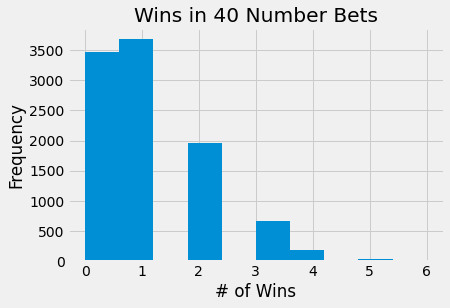

In [18]:
# solution here
results = []
for _ in range(10_000):
    results.append(simulate(40))

plt.hist(results)
plt.title("Wins in 40 Number Bets")
plt.xlabel("# of Wins")
plt.ylabel("Frequency")
plt.show()

**Question 4 (3 pts).** In the cell below, calculate the proportion of simulations for which you get 7 wins or more. Do your simulations suggest that the customer is cheating?

The customer is most likely cheating due to the fact that in 10,000 simulations, not once was there 7 wins or more in a 40 game simulation.

In [72]:
# calculation here
len([x for x in results if x >= 7]) / 10_000

0.0

**Question 5 (3 pts).**  Using a 10,000 trial simulation, generate a histogram of the empirical distribution of the net winnings/gain in 40 games (in each simulation of 40 games, you can calculate the net gain, which can be negative). Using the results of your 10,000 trial simulation, estimate the expected gain in 40 games.

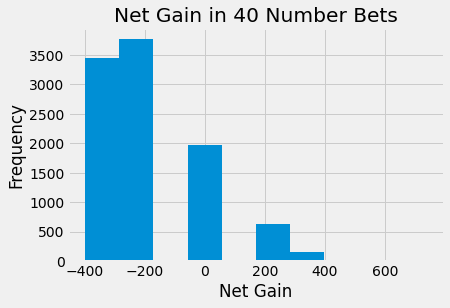

Average (Expected) Net Gain in 40 Bets: -202.647


In [20]:
# code here
nets = []
for _ in range(10_000):
    wins = simulate(40)
    net = -10 * 40 + wins * (190)
    nets.append(net)

plt.hist(nets)
plt.title("Net Gain in 40 Number Bets")
plt.xlabel("Net Gain")
plt.ylabel("Frequency")
plt.show()

print(f"Average (Expected) Net Gain in 40 Bets: {np.mean(nets)}")

## 2.  Earthquakes (15 points)

The next cell loads a table containing information about every earthquake above a magnitude of 4.5 in 2023 (prior to the time the file was downloaded on October 26, 2023), compiled by the US Geological Survey. (source: https://earthquake.usgs.gov/earthquakes/search/)

In [21]:
earthquakes = pd.read_csv('earthquakes_2023.csv')[['time', 'mag', 'place']]
print(earthquakes.shape)
earthquakes.head(5)

(5660, 3)


,time,mag,place
0,2023-10-26T16:05:11.437Z,5.9,NaN
1,2023-10-26T10:27:25.062Z,4.6,Fiji region
2,2023-10-26T09:34:21.206Z,4.6,"near the coast of Chiapas, Mexico"
3,2023-10-26T07:21:24.529Z,5.9,west of Macquarie Island
4,2023-10-26T05:44:19.794Z,5.5,"294 km ENE of Lospalos, Timor Leste"


There are a lot of earthquakes that occured in 2023 that are of interest, and generally, we won't have access to this large population. Instead, if we sample correctly, we can take a small subsample of earthquakes in that year to get an idea about the distribution of magnitudes throughout the year!

**Question 6 (3 pts)**. In the following lines of code, we take two different samples from the earthquake data frame, and calculate the mean of the magnitudes of these earthquakes. Are these samples representative of the population of earthquakes in the original table (that is, the should we expect the mean to be close to the population mean)?   Justify your answer and state any assumptions you are making.

**Hint**: Consider the ordering of the earthquakes table.

In [24]:
sample1 = earthquakes.sort_values(by=['mag'], ascending = False).head(100)
sample1_magnitude_mean = np.mean(sample1.mag)
sample2 = earthquakes.head(100)
sample2_magnitude_mean = np.mean(sample2.mag)
[sample1_magnitude_mean, sample2_magnitude_mean]

[6.483999999999998, 4.854]

The first sample mean is the mean of the top 100 highest-magnitude earthquakes and as such should be higher than the population mean. The second one should be significantly closer to the population mean as the earthquakes are ordered by time, a factor that should not heavily influence magnitude.

**Question 7 (3 pts).** Write code producing a sample of size 500 that represents the population, then take the mean of the magnitudes of the earthquakes in this sample. Assign these to `representative_sample` and `representative_mean` respectively. Note that Pandas have a `.sample` function that we illustrated in class.

In [25]:
representative_sample = earthquakes.sample(500)
representative_mean = np.mean(earthquakes.mag)
representative_mean

4.8103904593639575

**Question 8 (3 pts).** Suppose we want to figure out what the biggest magnitude earthquake was this year, but we are tasked with doing this only with a sample of 500 from the earthquakes table. 

To determine whether trying to find the biggest magnitude from a sample is a plausible idea, write code that simulates the maximum of a random sample of size 500 from the `earthquakes` table 5000 times. Assign your array of maximums to `maximums`. 

In [28]:
maximums = []
for i in np.arange(5000): 
    maximums.append(earthquakes.sample(500).mag.max())

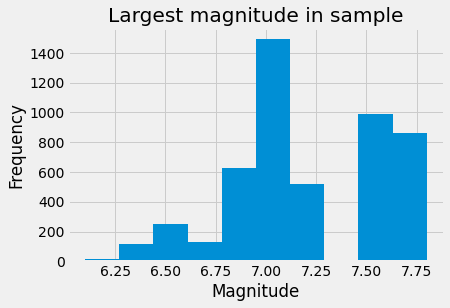

In [73]:
#Plot a Histogram of your maximums using the code below
plt.hist(maximums)
plt.title('Largest magnitude in sample')
plt.xlabel("Magnitude")
plt.ylabel("Frequency")
plt.show() 

**Question 9 (3 pts).** Find the magnitude of the (actual) strongest earthquake this year to help you determine your answer.

In [31]:
strongest_earthquake_magnitude = earthquakes.mag.max()
strongest_earthquake_magnitude

7.8

**Question 10 (3 pts)**. Based on your experiment above, is a single random sample of size 500 likely to help you determine the largest magnitude earthquake in the population?  Why or why not? 

No because the most commonly returned maximum in a sample size of 500 was in between 7 and 7.25 whereas the actual maximum magnitude was 7.8.

## 3. Causes of Death by Year (23 points)


This exercise is designed to give you practice working with dataframes `pivot_table()` and `merge()`. 

We'll be looking at a dataset from the California Department of Public Health that records the cause of death, as recorded on a death certificate, for everyone who died in California from 1999 to 2013.  The data is in the file `causes_of_death.csv.zip`. Each row records the number of deaths by a specific cause in one year in one ZIP code.

To make the file smaller, we've compressed it; run the next cell to unzip and load it.

In [33]:
#!unzip -o causes_of_death.csv.zip
causes = pd.read_csv('causes_of_death.csv')
causes.head()

,Year,ZIP Code,Cause of Death,Count,Location
0,1999,90002,SUI,1,"(33.94969, -118.246213)"
1,1999,90005,HOM,1,"(34.058508, -118.301197)"
2,1999,90006,ALZ,1,"(34.049323, -118.291687)"
3,1999,90007,ALZ,1,"(34.029442, -118.287095)"
4,1999,90009,DIA,1,"(33.9452, -118.3832)"


**Question 11 (4 pts).** Create a dataframe with two columns, one for Cause of Death and the other contaning a count of the total number of deaths in the dataset due to that cause.  Call the dataframe `cause_count`.

*Hint 1:* If all of your causes have the exact same count, then you probably have done something wrong.

*Hint 2:* You may need to use reset_index() to get a column named "Cause of Death" rather than it being the index.

In [34]:
#replace the ...
cause_count = causes.groupby(['Cause of Death']).sum(numeric_only=True).reset_index()[["Cause of Death", "Count"]]
cause_count

,Cause of Death,Count
0,ALZ,111178
1,CAN,822906
2,CLD,194961
3,DIA,106960
4,HOM,21336
5,HTD,957108
6,HYP,41251
7,INJ,157313
8,LIV,60526
9,NEP,14338


The causes of death in the data are abbreviated.  We've provided a file called `abbreviations.csv` to decode the abbreviations.

In [36]:
abbreviations = pd.read_csv('abbreviations.csv')
abbreviations

,Cause of Death,Cause of Death (Full Description)
0,AID,Acquired Immune Deficiency Syndrome (AIDS)
1,ALZ,Alzheimer's Disease
2,CAN,Malignant Neoplasms (Cancers)
3,CLD,Chronic Lower Respiratory Disease (CLRD)
4,CPD,Chronic Obstructive Pulmonary Disease (COPD)
5,DIA,Diabetes Mellitus
6,HIV,Human Immunodeficiency Virus Disease (HIVD)
7,HOM,Homicide
8,HTD,Diseases of the Heart
9,HYP,Essential Hypertension and Hypertensive Renal ...


**Question 12 (4 pts).** Use the `abbreviations` dataframe to create a dataframe called `full_cause_count` that has the same two columns as `cause_count`, but that has the cause abreviations replaced by their full names.  To get full credit, the two columns should appear in the same order and have the same names as in the original `cause_count` dataframe. 

In [37]:
#You may need a few lines of code to do this in addition to replacing the ...
full_cause_count = cause_count
full_cause_count["Cause of Death"] = full_cause_count["Cause of Death"].map(abbreviations.set_index("Cause of Death")["Cause of Death (Full Description)"])
full_cause_count

,Cause of Death,Count
0,Alzheimer's Disease,111178
1,Malignant Neoplasms (Cancers),822906
2,Chronic Lower Respiratory Disease (CLRD),194961
3,Diabetes Mellitus,106960
4,Homicide,21336
5,Diseases of the Heart,957108
6,Essential Hypertension and Hypertensive Renal ...,41251
7,Unintentional Injuries,157313
8,Chronic Liver Disease and Cirrhosis,60526
9,Kidney Disease (Nephritis),14338


**Question 13 (3 pts).** Several of the causes in the abbreviations dataframe do not appear in `full_cause_count`.   Which ones are missing and why don't they appear in `full_cause_count` (even with, say, some sort of default value or `NaN` for `Count sum`)?

They do not appear in full_cause_count because they are not present in the causes_of_death csv file. That dataset excludes them (presumably because they had no attributed deaths in the time frame) and as such, all though they are represented in the abbreviations dataset, the missing causes never come up in the causes_of_death csv and therefore are never translated to their corresponding names in the abbrviations dataset. Thus, they are simply never called upon and therefore they do not appear in the full_cause_count.

#### We wish to examine the changes in causes of death over time.  To make a plot of those numbers, we would like to have a dataframe with one row per year, and the information about all the causes of death for each year.

**Question 14. (4 pts)** Create a dataframe with **one row for each year** and **a column for each cause of death**, where each cell contains the number of deaths by that cause in that year. Call the dataframe `causes_by_year`.  *Note*: For this dataframe it is best to use the original `causes` dataframe (the one with abreviations) so that it fits on the screen.

In [39]:
#The pivot_table function does this for you
#fill in the ...
causes_by_year = pd.pivot_table(causes[['Year', 'Cause of Death', 'Count']], index='Year', columns='Cause of Death', aggfunc=sum, fill_value=0)
causes_by_year

Count                                                      \
Cause of Death    ALZ    CAN    CLD   DIA   HOM    HTD   HYP    INJ   LIV   
Year                                                                        
1999             3934  52880  13187  6004  2042  69900     0   8940  3546   
2000             4398  53005  12754  6203  2084  68533     0   8814  3673   
2001             4897  53810  13056  6457  2301  69004  2348   9274  3759   
2002             5405  53926  12643  6783  2459  68387     0   9882  3725   
2003             6585  54307  13380  7088  2481  69013  2578  10470  3832   
2004             6962  53708  12519  7119  2489  65002  2860  10614  3686   
2005             7694  54606  13166  7679  2528  64684  3030  10924  3819   
2006             8141  54043  12807  7367  2596  64648  3187  11236  3826   
2007             8495  54918  12497  7395  2356  62220  3189  11426  4052   
2008            10095  54579  13346  7349     0  60739  3417  10667  4142   
2009             9882  55753  12905  6961     0  58801  3554  10608  4256   
2010            10833  56124  12928  7027     0  58034  3722  10108  4252   
2011             6169  56229  13301  7653     0  59259  4156  11531  4536   
2012             5820  57514  12922  7877     0  59052  4498  11630  4645   
2013            11868  57504  13550  7998     0  59832  4712  11189  4777   

                                                 
Cause of Death   NEP    OTH    PNF    STK   SUI  
Year                                             
1999               0  38392   8014  18079  3047  
2000               0  39259   8355  18090  3113  
2001               0  38383   8167  18078  3256  
2002               0  41177   8098  17551  3210  
2003               0  40325   8184  17686  3396  
2004               0  39926   7331  16884  3364  
2005               0  41791   7537  15550  3188  
2006               0  42965   7329  15011  3296  
2007               0  43130   6522  13724  3543  
2008            2841  42800   6576  13792  3729  
2009            3017  42507   6350  13410  3760  
2010            3073  43785   5856  13566  3835  
2011            2588  45865  10334  13420  3965  
2012               0  47722  10750  13453  3864  
2013            2819  49737   6523  13603  4006

**Question 15 (4 pts).** Looking at the `causes_by_year` dataframe, it appears that three of the causes have missing data in several years.   Create a new dataframe `cleaned_causes_by_year` that has these three columns removed.  Your result should have 12 columns (not counting the `Year` index).

In [64]:
# removing HOM, HYP, NEP
cleaned_causes_by_year = causes_by_year.loc[:, ~(causes_by_year == 0).any()]
cleaned_causes_by_year

Count                                                        \
Cause of Death    ALZ    CAN    CLD   DIA    HTD    INJ   LIV    OTH    PNF   
Year                                                                          
1999             3934  52880  13187  6004  69900   8940  3546  38392   8014   
2000             4398  53005  12754  6203  68533   8814  3673  39259   8355   
2001             4897  53810  13056  6457  69004   9274  3759  38383   8167   
2002             5405  53926  12643  6783  68387   9882  3725  41177   8098   
2003             6585  54307  13380  7088  69013  10470  3832  40325   8184   
2004             6962  53708  12519  7119  65002  10614  3686  39926   7331   
2005             7694  54606  13166  7679  64684  10924  3819  41791   7537   
2006             8141  54043  12807  7367  64648  11236  3826  42965   7329   
2007             8495  54918  12497  7395  62220  11426  4052  43130   6522   
2008            10095  54579  13346  7349  60739  10667  4142  42800   6576   
2009             9882  55753  12905  6961  58801  10608  4256  42507   6350   
2010            10833  56124  12928  7027  58034  10108  4252  43785   5856   
2011             6169  56229  13301  7653  59259  11531  4536  45865  10334   
2012             5820  57514  12922  7877  59052  11630  4645  47722  10750   
2013            11868  57504  13550  7998  59832  11189  4777  49737   6523   

                             
Cause of Death    STK   SUI  
Year                         
1999            18079  3047  
2000            18090  3113  
2001            18078  3256  
2002            17551  3210  
2003            17686  3396  
2004            16884  3364  
2005            15550  3188  
2006            15011  3296  
2007            13724  3543  
2008            13792  3729  
2009            13410  3760  
2010            13566  3835  
2011            13420  3965  
2012            13453  3864  
2013            13603  4006

**Question 16 (4 pts).**  Draw a line graph to display the numbers of deaths from Stroke (STK), Chronic Liver Desease (CLD), Heart Disease(HTD) and Cancer (CAN) over the 14 years covered by this dataset. **Briefly, what is happening with the death rates from these causes?**


The death rates from strokes and heart disease have decreased gradually, while death rates from chronic liver disease have stayed relatively the same over the years. On the other hand, the death rates from cancer have risen.

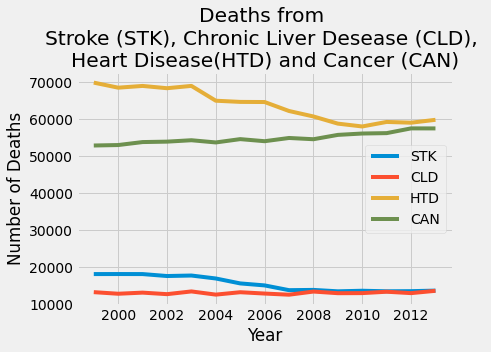

In [68]:
# solution here
plt.plot(cleaned_causes_by_year['Count'][['STK', 'CLD', 'HTD', 'CAN']])
plt.legend(["STK", "CLD", "HTD", "CAN"])
plt.title("Deaths from \nStroke (STK), Chronic Liver Desease (CLD), \nHeart Disease(HTD) and Cancer (CAN)")
plt.xlabel("Year")
plt.ylabel("Number of Deaths")
plt.show()